In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
import random

In [69]:
# reading data from file ..
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
x_train = data.iloc[:,[1,2,3,4]].values
y = data.iloc[:,[5]].values

In [71]:
def fit_y_data(y):
    a_y = []
    for i in y:
        if(i[0] == 'Iris-setosa'):
            a_y.append(1)
        if(i[0] == 'Iris-versicolor'):
            a_y.append(2)
        if(i[0] == 'Iris-virginica'):
            a_y.append(3)
    y = np.array(a_y)
    return y


In [72]:
y_given = fit_y_data(y)

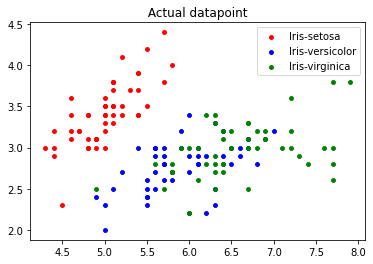

In [73]:
plt.scatter(x_train[y_given == 1,0], x_train[y_given==1,1],s = 15, c= 'red', label = 'Iris-setosa')
plt.scatter(x_train[y_given == 2,0], x_train[y_given==2,1],s = 15, c= 'blue', label = 'Iris-versicolor')
plt.scatter(x_train[y_given == 3,0], x_train[y_given==3,1],s = 15, c= 'green', label = 'Iris-virginica')
plt.title(' Actual datapoint ')
plt.legend()
plt.show()

In [74]:
def cost_func(data,index,eps):
    d = data.iloc[index].to_numpy()
    dataset = data.to_numpy()
    c = 0
    i = 0
    s = 0
    list = []
    for p in dataset:
         s = np.linalg.norm(p - d)
         if(s<=eps and i != index):
               c += 1
               list.append(i)
         i += 1
    return list

In [75]:
def point_type(eps,minPts, data, index):
    count = cost_func(data,index,eps)
    if len(count) >= minPts:
        return (count , True, False, False)
    
    elif (len(count) < minPts) and len(count) > 0:
        return (count , False, True, False)
    
    elif len(count) == 0:
        return (count , False, False, True)

In [76]:
def DBSCAN(eps, minPts, df):
    C = 1
    current_stack = set()
    unvisited = list(df.index)
    clusters = []

    while (len(unvisited) != 0):  
        first_point = True
        current_stack.add(random.choice(unvisited))
        while len(current_stack) != 0:  
            curr_idx = current_stack.pop()
            neighbours, iscore, isborder, isnoise = point_type(eps, minPts, df, curr_idx)
            
            if (isborder & first_point):
                clusters.append((curr_idx, 0))
                clusters.extend(
                    list(zip(neighbours, [0 for _ in range(len(neighbours))])))
                unvisited.remove(curr_idx)
                unvisited = [e for e in unvisited if e not in neighbours]
                continue
            unvisited.remove(curr_idx)  
            neighbours = set(neighbours) & set(
                unvisited)  
            if iscore:  
                first_point = False
                clusters.append((curr_idx, C))  
                current_stack.update(neighbours)
            elif isborder:  
                clusters.append((curr_idx, C))
                continue
            elif isnoise:  
                clusters.append((curr_idx, 0))
                continue
        
        if not first_point:
            C += 1
    return clusters

In [77]:
eps = 0.3
minPts = 3

In [78]:
data = pd.DataFrame(x_train, columns = ["SepalLength", "SepalWidth","PetalLength","PetalWidth"] )
clustered = DBSCAN(eps, minPts, data)


In [79]:
idx , cluster = list(zip(*clustered))

In [80]:
np.unique(cluster)

array([0, 1, 2, 3])

In [81]:
cluster_df = pd.DataFrame(clustered, columns = ["idx", "cluster"])

Text(0.5, 1.0, 'Clustered Data')

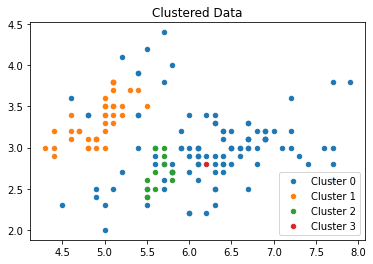

In [82]:
for clust in np.unique(cluster):
    plt.scatter(x_train[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], x_train[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=20, label=f"Cluster : {clust}")
plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)])
plt.title('Clustered Data')